In [41]:
import numpy as np
import matplotlib.pyplot as plt

In [105]:
def B_sheet(r_a,r_b,r_2,n ,Br,alpha):

    pp = alpha*np.cross(r_2 - r_a,n)
    A = np.dot(r_2-r_a,r_2-r_a)
    B = np.dot(r_2 - r_a,r_b - r_a)
    C = np.dot(r_b - r_a,r_b - r_a)
    D = np.dot(r_2 - r_a,pp) 
    P = alpha*np.cross((r_b - r_a),n) 

    a1 = A*C - 2*B*C +C**2
    b1 = -2*C*D
    c1 = (alpha**2)*C**2
    p1 = (C-B)**2
    d1 = b1**2 - 4*(a1 + p1)*c1


    a2 = A*C
    b2 = -2*C*D
    c2 = (alpha**2)*C**2

    ru = a1 + b1*(1/2) + c1*(1/2)**2 
    rl = a2 + b2*(-1/2) + c2*(-1/2)**2

    su = 0.5
    sl = 0.5

    if p1 > 0:
        I1 = np.arctan(np.sqrt(ru/p1)) -  np.arctan(np.sqrt(rl/p1))
    else:
        I_u1 = np.log(np.sqrt(-p1) - np.sqrt(ru)/(np.sqrt(-p1) + np.sqrt(ru)))
        I_l1 = np.log(np.sqrt(-p1) - np.sqrt(rl)/(np.sqrt(-p1) + np.sqrt(rl)))
        I1 = 1/(2*np.sqrt(-p1))*(I_u1 - I_l1)
    if p1*d1 > 0:
        I2 = - np.arctan(np.sqrt(p1/dq))*(B1 + 2*C1*su/np.sqrt(Ru)) + np.arctan(np.sqrt(p1/dq))*(B1 + 2*C1*sl/np.sqrt(Rl))
    else:
        if p1 >0:
            I2_u = np.log((np.sqrt(-d1)*np.sqrt(ru) + np.sqrt(p1)*(b1 + 2*c1*(0.5)))/(np.sqrt(-d1)*np.sqrt(ru)- np.sqrt(p1)*(b1 + 2*c1*(0.5)))) 
            I2_l = np.log((np.sqrt(-d1)*np.sqrt(rl) + np.sqrt(p1)*(b1 + 2*c1*(-0.5)))/(np.sqrt(-d1)*np.sqrt(rl)- np.sqrt(p1)*(b1 + 2*c1*(-0.5)))) 
            I2 = 1/(2*1j)*(I2_u - I2_l)
        else:
            I2_u = np.log((np.sqrt(d1)*np.sqrt(ru) + np.sqrt(-p1)*(b1 + 2*c1*(0.5)))/(np.sqrt(d1)*np.sqrt(ru)- np.sqrt(-p1)*(b1 + 2*c1*(0.5)))) 
            I2_l = np.log((np.sqrt(d1)*np.sqrt(rl) + np.sqrt(-p1)*(b1 + 2*c1*(-0.5)))/(np.sqrt(d1)*np.sqrt(rl)- np.sqrt(-p1)*(b1 + 2*c1*(-0.5))))
            I2 =  1/(2*1j)*(I2_u - I2_l)
        U1 = B
        v1 = C-B
        if  (c1**2)*p1*((b1)**2 - 4*(a1 +p1)*c1) >  0:
            integ_1 = (U1/c1)*I1  - I2*(2*(v1*c1)-U1*b1)/(np.sqrt((c1**2)*p1*((b1)**2 - 4*(a1 +p1)*c1)))
        else:
            integ_1 = (U1/c1)*I1  - I2*(2*(v1*c1)-U1*b1)/(1J*np.sqrt(abs((c1**2)*p1*((b1)**2 - 4*(a1 +p1)*c1))))
        B_s = (Br*alpha*C/(4*np.pi))*integ_1*(np.cross(r_b - r_a,r_2 - r_a)) + (Br*alpha/(4*np.pi))*integ_1

    return np.real(B_s)
   
    


In [117]:
r_a = np.array([2,0.3,0.3])
r_b = np.array([2.02,3,0.3])
n = np.array([0,0,-1])
alpha = (1e-3)/(np.linalg.norm(r_b - r_a))
Br = 1
x = np.linspace(-1,1,100)
y = np.linspace(-1,1,100)
z = np.linspace(-1,1,100)
X,Y,Z = np.meshgrid(x,y,z)
B_sx = B_sheet(r_a,r_b,[x,y,z],n,Br,alpha)
B_slx= []
B_sly = []
B_slz = []
n = [0,0,1]
for i in x:
    r_2x = np.array([i,3,9])
    r_2y = np.array([3,i,9])
    r_2z = np.array([3,9,i])
    B_sx = B_sheet(r_a,r_b,r_2x,n,Br,alpha)
    B_sy = B_sheet(r_a,r_b,r_2y,n,Br,alpha)
    B_sz = B_sheet(r_a,r_b,r_2z,n,Br,alpha)

    B_slx.append(B_sx[0])
    B_sly.append(B_sy[1])
    B_slz.append(B_sz[2])

fig,ax = plt.subplots(1,3, figsize = (15,5))

ax[0].plot(x,B_slx)
ax[1].plot(x,B_sly)
ax[2].plot(x,B_slz)

ax[0].set_ylabel('B_sx')
ax[1].set_ylabel('B_sy')
ax[2].set_ylabel('B_sz')

ax[0].set_xlabel('x(m)')
ax[1].set_xlabel('y(m)')
ax[2].set_xlabel('z(m)')

plt.tight_layout()

ValueError: operands could not be broadcast together with shapes (3,100) (3,) 

In [108]:
def make_cube(a2,alpha):
    ra1 = np.array([a2,-a2,0])
    rb1 = np.array([a2,a2,0])
    nn1 =  np.array([1,0,0])
    ra2 = rb1 
    rb2 = np.array([-a2,a2,0])
    nn2 = [0,1,0]
    r_a2 = rb2
    r_b3 = np.array([-a2,-a2,0])
    nn3 = np.array([-1,0,0])
    r_a4 = r_b3
    r_b4 = ra1
    nn4 = np.array([0,-1,0])
    return [ra1 , rb1 , nn1 , ra2 , rb2 , nn2 , r_a2 , r_b3 , nn3 , r_a4 , r_b4 , nn4]


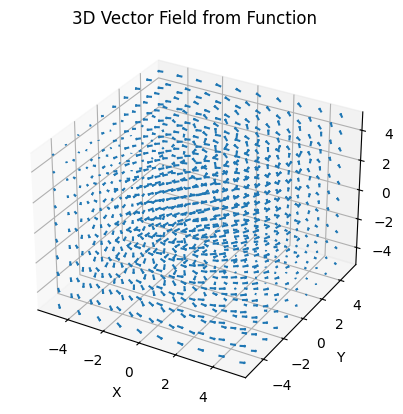

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function that produces [bx, by, bz] for given [x, y, z]
def B(x, y, z):
    # Example function for magnetic field components
    bx = -y
    by = x
    bz = z / 2
    return bx, by, bz

# Create grid of points (for example, a 3D grid of positions)
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)
z = np.linspace(-5, 5, 10)

# Create arrays to store vector components at each point
X, Y, Z = np.meshgrid(x, y, z)  # Create 3D grid

# Initialize arrays for the magnetic field components
BX = np.zeros(X.shape)
BY = np.zeros(X.shape)
BZ = np.zeros(X.shape)

# Compute [bx, by, bz] for each [x, y, z] point in the grid
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        for k in range(X.shape[2]):
            bx, by, bz = B(X[i, j, k], Y[i, j, k], Z[i, j, k])
            BX[i, j, k] = bx
            BY[i, j, k] = by
            BZ[i, j, k] = bz

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the vector field (only a slice of the grid for clarity)
ax.quiver(X, Y, Z, BX, BY, BZ, length=0.3, normalize=True)

# Labels and plot adjustments
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Vector Field from Function')

# Show the plot
plt.show()


Text(0.5, 0, 'X(cm)')

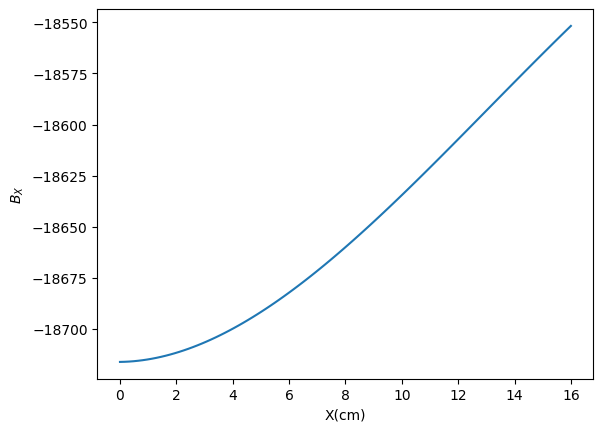

In [111]:
a = 1e-3/2
cube = make_cube((1e-3/2),2)
alpha = 2 
r_2 = np.array([1,1,1])
r_x = []
r_y = []
r_z = []
x = np.linspace(0,0.16,100)
for i in x:
    b_total = B_sheet(cube[0], cube[1],[i,1,1], cube[2],Br, alpha) + \
              B_sheet(cube[3], cube[4], [i,1+a/2,1], cube[5],Br, alpha) + \
              B_sheet(cube[6], cube[7],[i,1-a/2,1], cube[8],Br ,alpha) + \
              B_sheet(cube[9], cube[10],[i+a/2,1,1],cube[11],Br,alpha)
    r_x.append(b_total[0])

plt.plot(x*1e2,r_x)

plt.ylabel('$B_X$')
plt.xlabel('X(cm)')
    



In [79]:
cube[9] 
cube[10]
cube[11]
p = 
# B_sheet(cube[9], cube[10],[i+a/2,1,1],cube[11],alpha)

array([ 0, -1,  0])

In [82]:
r_b = cube[9]
r_a = cube[10]
n = cube[11]
alpha = 2 
P = alpha*np.cross((r_b - r_a),n) 
P

array([0.   , 0.   , 0.002])

In [83]:
 B_sheet(cube[0], cube[1],[i,1,1], cube[2], alpha)
 

array([-46900.8300641 , -46900.8300172 , -46900.83001722])